<Figure size 432x288 with 0 Axes>

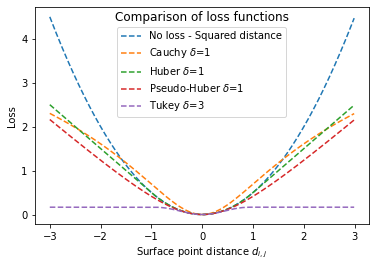

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

b=1
def NoLoss(x,b):
    return x*x/2
    if (np.fabs(x)<=b): return 1/2.0*x*x
    else: return b*(np.fabs(x)-b/2.0)
def Cauchy(x,b):
    return np.log(1+np.square(x/b))
def SoftL1(x,b):
    return b*b*(np.sqrt(1+np.square(x/b))-1)
def Turkey(x,b):
    if(np.fabs(x)<=b): return b*b / 6 * (1 - (np.power(1 - np.power(x / b,2),3)))
    else: return b*b / 6
    
    


x = np.arange(-3, 3, 0.01)

y_none = []
for i in range(len(x)):
   y_none.append(NoLoss(x[i],b))
y_huber = []
for i in range(len(x)):
   y_huber.append(Huber(x[i],b))

y_cauchy = []
for i in range(len(x)):
   y_cauchy.append(Cauchy(x[i],b))

y_softl1 = []
for i in range(len(x)):
   y_softl1.append(SoftL1(x[i],b))

y_tukey = []
for i in range(len(x)):
   y_tukey.append(Turkey(x[i],1))


y_combined = []
for i in range(len(x)):
   y_combined.append(Huber(Cauchy(x[i],0.01),0.1))

plt.figure()
fig, ax = plt.subplots()

plt.plot(x, y_none, '--',   label='No loss - Squared distance')
plt.plot(x, y_cauchy, '--', label='Cauchy $\delta$=1')
plt.plot(x, y_huber, '--',  label='Huber $\delta$=1')
plt.plot(x, y_softl1, '--', label='Pseudo-Huber $\delta$=1')
plt.plot(x, y_tukey, '--',  label='Tukey $\delta$=3')

#plt.plot(x, y_combined, 'y-')
leg = ax.legend(loc='center',bbox_to_anchor=(0.5, 0, 0.0, 1.4));
#ax.set_title('Residuals scaled by loss function',fontsize=10,loc='center')


#ax.set_xlabel(')
ax.set_ylabel('Loss')
#plt.axis('equal')
#ax.xaxis.set_label_position('top')
ax.set_xlabel('Surface point distance $d_{i,j}$')
ax.set_title('Comparison of loss functions', y=1.0, pad=-14)
plt.savefig('./output/robust_loss.png')
plt.savefig('./output/robust_loss.pdf')



#dd=df.sort_values(by=["z min", "k strongest"])
#filter_tab = dd.pivot_table(index='k strongest', columns='z min', values='Filtering avg')
#sns_plot_2 = sns.heatmap(filter_tab,vmin=3, vmax=20, cmap="coolwarm",annot=True, fmt=".1f",cbar_kws={'label': 'Computation time [ms]'},annot_kws={"size": 10})
#plt.title('Filtering time due to k-strong and z min')
#fig2=sns_plot_2.get_figure()
#fig2.savefig('./output/k-strongest_time.eps', format='eps')
#fig2.savefig('./output/k-strongest_time.png', format='png', dpi=1000)


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

x=str(u'\u03B4')
print(x)

df = pd.read_csv('./CFEAR_submap_keyframe_eval_2021-07-15_1348.csv', sep=r',', header=0)

df = df.rename(columns={'Transl. Error': 'Transl. Error[%]'})
df = df.rename(columns={'resolution r': 'resolution r [m]'})
df = df.rename(columns={'loss limit': x})

print(df.columns)

ax1=sns.lineplot(data=df, x=x, y="Transl. Error[%]") # legend=False  #label = 'Rotation error (deg/100m)'
#sns_plot = sns.catplot(x=" submap keyframes", y="Transl. Error[%]", hue="loss type", kind="box", dodge=True, data=df, legend_out=False, palette=pal)
#sns_plot.legend(loc='upper right', ncol=1)
#plt.title('Transl. Error vs number of submap keyframes')
#plt.ylim(1.3,3.8)
##plt.grid()
#plt.show()
#sns_plot.savefig('./output/Transl_error_submap_keyframes.eps', format='eps')
#sns_plot.savefig('./output/Transl_error_submap_keyframes.png', format='png', dpi=1500)



δ
Index(['z min', ' min distance', ' max distance', ' k strongest',
       ' topic_filtered', ' radar_frameid', ' dataset', ' input_points_topic',
       ' scan_registered_latest_topic', ' scan_registered_keyframe_topic',
       ' odom_latest_topic', ' odom_keyframe_topic', ' use_raw_pointcloud',
       ' submap keyframes', ' k strongest.1', ' resolution r',
       ' resample factor f', ' min. sensor distance [m]',
       ' min. sensor distance [deg]', ' use keyframe', ' use guess',
       ' radar reversed', ' disable registration', ' soft velocity constraint',
       ' compensate', ' cost type', ' todom_est_topic', ' gt_topic',
       'est_output_dir', ' gt_output_dir', ' sequence_nr', ' job nr',
       ' nr frames', 'Transl. Error[%]', ' Rot.err. [deg/100m]', ' ATE [m]',
       'RPE [m]', ' RPE-dev [m]', ' RPE [deg]', ' RPE-dev [deg]',
       ' bias-x [m]', ' bias-y [m]', ' bias-theta [deg]'],
      dtype='object')
